Predicting Stock Prices:Time Series Model

In [1]:
#GARCH Model(AR)and(MA)


Download daily prices for the last 10 years for the NVDA stock

In [11]:
import matplotlib.pyplot as plt
import yfinance as yf
import pandas as pd 
import numpy as np
import statsmodels.api as sm



In [12]:
nvda_stock=yf.download(tickers='NVDA', start='2012-01-01', end='2023-01-29')
nvda_stock.head(20)

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,3.5750,3.6000,3.5025,3.5100,3.220763,46804400
2012-01-04,3.5125,3.5650,3.4800,3.5500,3.257468,34737200
2012-01-05,3.5325,3.6950,3.5175,3.6775,3.374461,56354800
2012-01-06,3.6750,3.6775,3.5925,3.6350,3.335464,53325200
2012-01-09,3.6375,3.7050,3.6100,3.6350,3.335464,50824400
2012-01-10,3.6900,3.6925,3.5950,3.6200,3.321699,54632800
2012-01-11,3.5875,3.6200,3.5325,3.5475,3.255173,48427200
2012-01-12,3.5550,3.5575,3.4475,3.5250,3.234528,65236400
2012-01-13,3.5000,3.5075,3.4150,3.4325,3.149650,50430000


Calculate log returns and plot the autocorrelation and partial-autocorrelation graphs for log returns, then do the same for daily volatility.

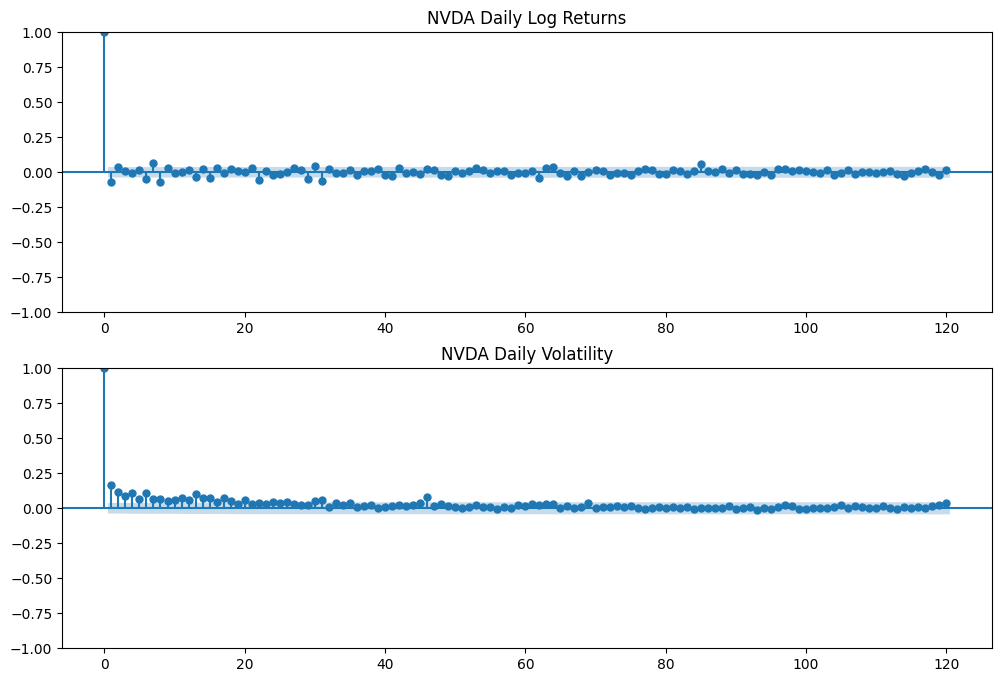

In [13]:
#Calculate log returns
nvda_log_ret = np.log(nvda_stock['Adj Close']).diff().dropna()

#Calculate daily volatility
nvda_daily_vol = (nvda_log_ret-nvda_log_ret.mean())**2

#plot autocorrelation and partila correlation graphs for log returns
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12,8))

sm.graphics.tsa.plot_acf(nvda_log_ret, lags=120, ax=ax1)
ax1.set(title='NVDA Daily Log Returns')

sm.graphics.tsa.plot_acf(nvda_daily_vol, lags=120, ax=ax2)
ax2.set(title='NVDA Daily Volatility')

plt.show()


In [17]:
from arch import arch_model
from sklearn.metrics import mean_squared_error

trainsize = 10 * 252

data = nvda_log_ret.clip(lower=nvda_log_ret.quantile(.05),
                     upper=nvda_log_ret.quantile(.95))

T = len(nvda_log_ret)

results = {}

for p in range(1, 5):
    
    for q in range(1, 5):
        
        print(f'{p} | {q}')

        result = []

        for s, t in enumerate(range(trainsize, T-1)):

            train_set = data.iloc[s:t]

            test_set = data.iloc[t+1]

            model = arch_model(y=train_set, p=p, q=q).fit(disp='off')

            forecast = model.forecast(horizon=1)

            mu = forecast.mean.iloc[-1, 0]

            var = forecast.variance.iloc[-1, 0]

            result.append([(test_set-mu)**2, var])

        df = pd.DataFrame(result, columns=['y_true', 'y_pred'])
        y_rescaled = 100 * y


        results[(p, q)] = np.sqrt(mean_squared_error(df.y_true, df.y_pred))

pd.DataFrame(results, index=pd.Series(0)).unstack().idxmin()

1 | 1


c:\Users\hp\anaconda3\envs\myenv\lib\site-packages\arch\univariate\base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0004007. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
c:\Users\hp\anaconda3\envs\myenv\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
c:\Users\hp\anaconda3\envs\myenv\lib\site-packages\arch\univariate\base.py:309: DataScaleWarning: y is poorly scaled, which may affec

1 | 2


c:\Users\hp\anaconda3\envs\myenv\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
c:\Users\hp\anaconda3\envs\myenv\lib\site-packages\arch\univariate\base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0004007. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
c:\Users\hp\anaconda3\envs\myenv\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. A

1 | 3


c:\Users\hp\anaconda3\envs\myenv\lib\site-packages\arch\univariate\base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0004011. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
c:\Users\hp\anaconda3\envs\myenv\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
c:\Users\hp\anaconda3\envs\myenv\lib\site-packages\arch\univariate\base.py:309: DataScaleWarning: y is poorly scaled, which may affec